1.0
0.9300699300699301


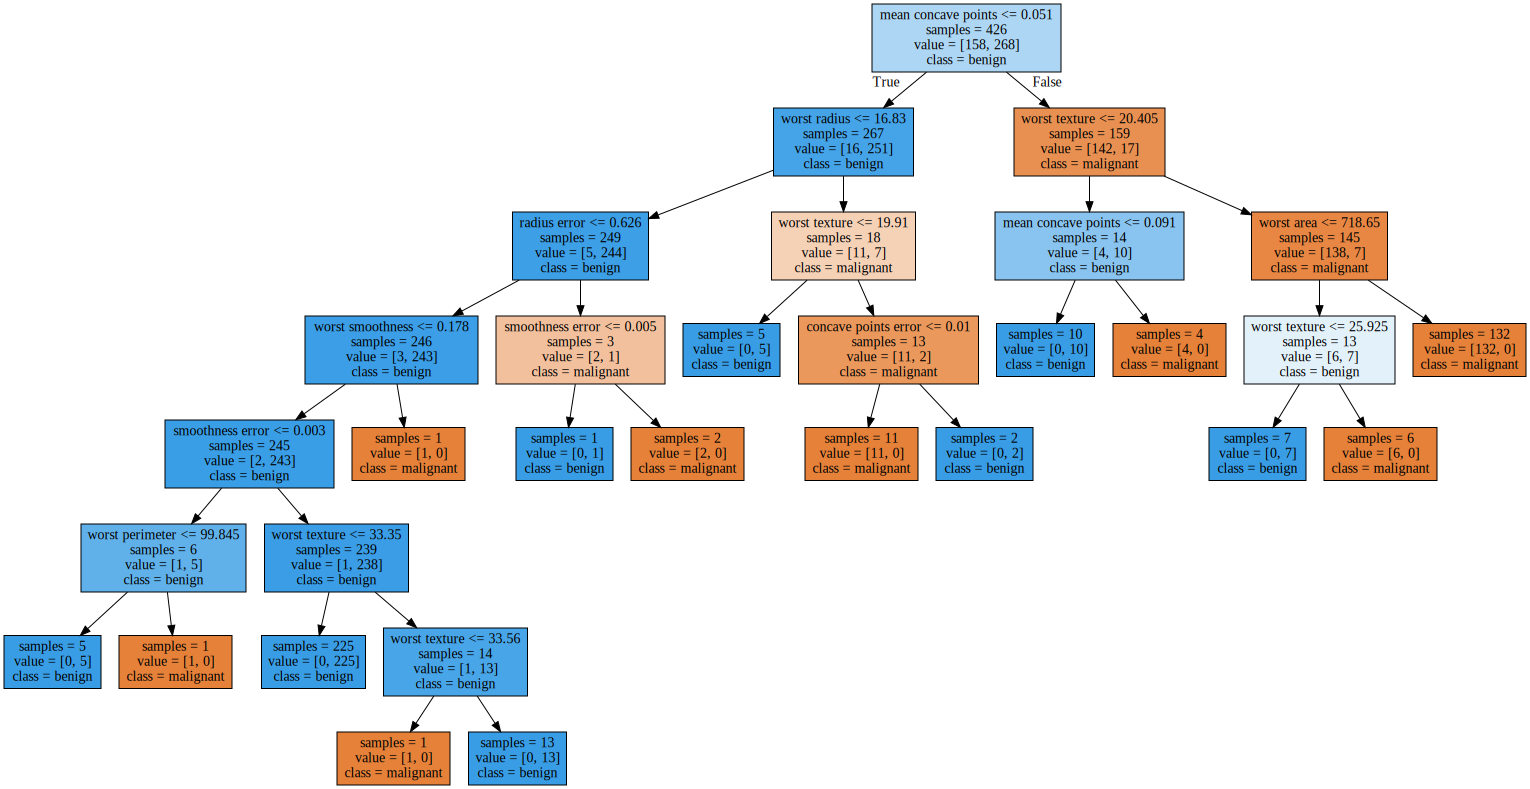

In [14]:
from sklearn import tree
from sklearn import datasets
from sklearn import model_selection
from matplotlib import pyplot as plt
import numpy as np
import graphviz
import sklearn


cancer=datasets.load_breast_cancer()
X_train, X_test, y_train, y_test=sklearn.model_selection.train_test_split(
cancer.data, cancer.target, random_state=42)

#1.0 training score, nice overfit.
treex=tree.DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
print(treex.score(X_train, y_train))
print(treex.score(X_test, y_test))

tree.export_graphviz(treex, out_file="tree.dot", class_names=["malignant"
                                                            , "benign"], 
                    feature_names=cancer.feature_names, impurity=False, 
                    filled=True)


with open("tree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)


 [0.         0.         0.         0.         0.         0.
 0.         0.72468105 0.         0.         0.01277192 0.
 0.         0.         0.00826156 0.         0.         0.01702539
 0.         0.         0.05899273 0.12550655 0.00838371 0.03452044
 0.00985664 0.         0.         0.         0.         0.        ] 



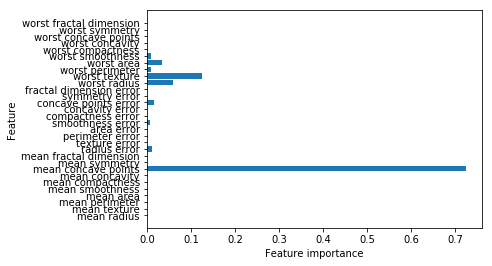

In [15]:
print("\n",treex.feature_importances_,"\n")

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(treex)

0.9953051643192489
0.951048951048951


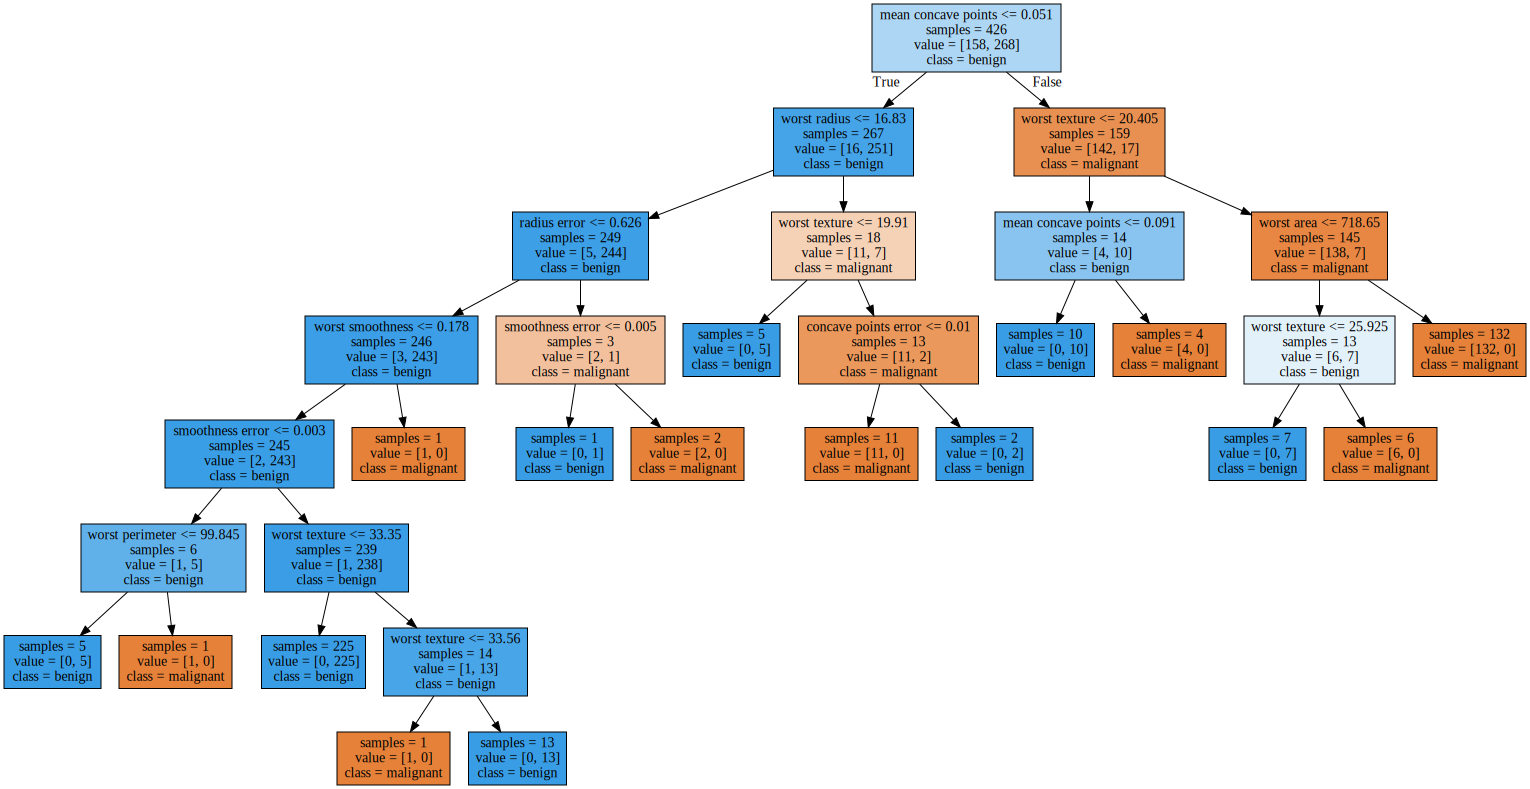

In [2]:
treex=tree.DecisionTreeClassifier(max_depth=4, random_state=0).fit(X_train, y_train)
print(treex.score(X_train, y_train))
print(treex.score(X_test, y_test))

#Limiting depth, reduced complexity and overfitting.

with open("tree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)